In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [2]:
# Have to run this with the .values on X and y, to avoid passing the series with
# field names etc.
x_train, x_test, y_train, y_test = train_test_split(
    x.values, y.values, test_size=0.3, random_state=123
)

In [3]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=123,
            oob_score=True,
            n_jobs=-1,
        )


In [4]:
forest_model.fit(x_train, y_train.ravel())

RandomForestClassifier(max_depth=10, n_jobs=-1, oob_score=True,
                       random_state=123)

In [5]:
import pygraphviz as pgv
import networkx as nx
from sklearn import tree

directed_graphs = []
for estimator in forest_model.estimators_:
            pgv_tree_string = tree.export_graphviz(
                estimator, feature_names=iris.feature_names
            )
            pgv_digraph = pgv.AGraph(directed=True)
            pgv_digraph = pgv.AGraph(pgv_tree_string)
            nx_digraph = nx.DiGraph()
            nx_digraph = nx.nx_agraph.from_agraph(pgv_digraph)
            directed_graphs.append(nx_digraph)

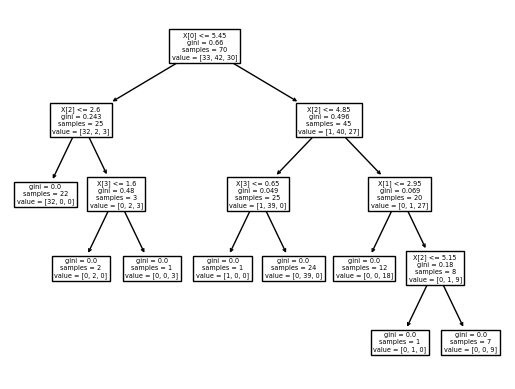

In [8]:
import matplotlib.pyplot as plt

my_tree = forest_model.estimators_[0]
tree.plot_tree(my_tree)
plt.show()

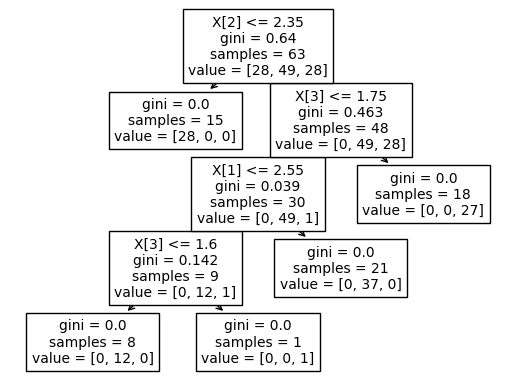

In [10]:
my_tree2 = forest_model.estimators_[1]
tree.plot_tree(my_tree2)
plt.show()

In [29]:
pgv_tree_string = tree.export_graphviz(
    my_tree2, feature_names=iris.feature_names, class_names=iris.target_names
)
pgv_tree_string

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal length (cm) <= 2.35\\ngini = 0.64\\nsamples = 63\\nvalue = [28, 49, 28]\\nclass = versicolor"] ;\n1 [label="gini = 0.0\\nsamples = 15\\nvalue = [28, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.463\\nsamples = 48\\nvalue = [0, 49, 28]\\nclass = versicolor"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="sepal width (cm) <= 2.55\\ngini = 0.039\\nsamples = 30\\nvalue = [0, 49, 1]\\nclass = versicolor"] ;\n2 -> 3 ;\n4 [label="petal width (cm) <= 1.6\\ngini = 0.142\\nsamples = 9\\nvalue = [0, 12, 1]\\nclass = versicolor"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 12, 0]\\nclass = versicolor"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]\\nclass = virginica"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 21\\nvalue = [0, 37

In [37]:
pgv_digraph = pgv.AGraph(directed=True)
pgv_digraph = pgv.AGraph(pgv_tree_string)
pgv_digraph.draw("file.png", format="png", prog="dot")
pgv_digraph.string()

'digraph Tree {\n\tnode [fontname=helvetica,\n\t\tshape=box\n\t];\n\tedge [fontname=helvetica];\n\t0\t[label="petal length (cm) <= 2.35\\ngini = 0.64\\nsamples = 63\\nvalue = [28, 49, 28]\\nclass = versicolor"];\n\t1\t[label="gini = 0.0\\nsamples = 15\\nvalue = [28, 0, 0]\\nclass = setosa"];\n\t0 -> 1\t[headlabel=True,\n\t\tlabelangle=45,\n\t\tlabeldistance=2.5];\n\t2\t[label="petal width (cm) <= 1.75\\ngini = 0.463\\nsamples = 48\\nvalue = [0, 49, 28]\\nclass = versicolor"];\n\t0 -> 2\t[headlabel=False,\n\t\tlabelangle=-45,\n\t\tlabeldistance=2.5];\n\t3\t[label="sepal width (cm) <= 2.55\\ngini = 0.039\\nsamples = 30\\nvalue = [0, 49, 1]\\nclass = versicolor"];\n\t2 -> 3;\n\t8\t[label="gini = 0.0\\nsamples = 18\\nvalue = [0, 0, 27]\\nclass = virginica"];\n\t2 -> 8;\n\t4\t[label="petal width (cm) <= 1.6\\ngini = 0.142\\nsamples = 9\\nvalue = [0, 12, 1]\\nclass = versicolor"];\n\t3 -> 4;\n\t7\t[label="gini = 0.0\\nsamples = 21\\nvalue = [0, 37, 0]\\nclass = versicolor"];\n\t3 -> 7;\n\t5\

In [ ]:
nx_digraph = nx.DiGraph()
nx_digraph = nx.nx_agraph.from_agraph(pgv_digraph)

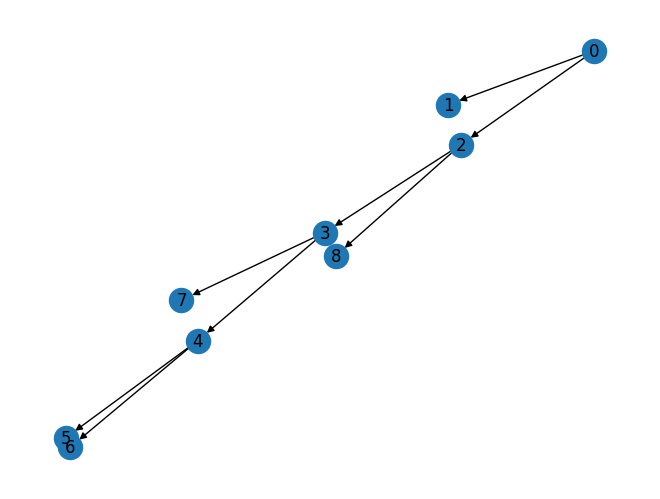

In [28]:
nx.draw_kamada_kawai(nx_digraph, with_labels=True)

In [56]:
dist = nx.graph_edit_distance(directed_graphs[0], directed_graphs[2], roots=("0", "0"), timeout=10)
dist

12.0

[[('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1),
  ('9', 1),
  ('10', 1),
  ('11', 1),
  ('12', 1),
  ('13', 1),
  ('14', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1),
  ('9', 1),
  ('10', 1),
  ('11', 1),
  ('12', 1),
  ('13', 1),
  ('14', 1),
  ('15', 1),
  ('16', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1),
  ('9', 1),
  ('10', 1),
  ('11', 1),
  ('12', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1),
  ('9', 1),
  ('10', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5', 1),
  ('6', 1),
  ('7', 1),
  ('8', 1),
  ('9', 1),
  ('10', 1)],
 [('0', 0),
  ('1', 1),
  ('2', 1),
  ('3', 1),
  ('4', 1),
  ('5